In [1]:
# import dependencies
import pandas as pd
import numpy as np
import gmaps
import requests
import matplotlib.pyplot as plt
import seaborn as sn
from scipy.stats import linregress
from config import key_dict
gkey=key_dict["maps"]

In [4]:
# read in csv file for data
all_data = pd.read_csv("Resources/all_data.csv")
all_data.head()

,Year,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,2015,Afghanistan,Southern Asia,153,3.575,0.319820,0.302850,0.303350,0.23414,0.097190,0.365100,1.952100
1,2016,Afghanistan,Southern Asia,154,3.360,0.382270,0.110370,0.173440,0.16430,0.071120,0.312680,2.145580
2,2017,Afghanistan,Southern Asia,141,3.794,0.401477,0.581543,0.180747,0.10618,0.061158,0.311871,2.150801
3,2018,Afghanistan,Southern Asia,145,3.632,0.332000,0.537000,0.255000,0.08500,0.036000,0.191000,NaN
4,2019,Afghanistan,Southern Asia,154,3.203,0.350000,0.517000,0.361000,0.00000,0.025000,0.158000,NaN


In [5]:
# read in csv for lat/lng
coordinates = pd.read_csv("Resources/coords.csv", encoding="Latin-1")
coordinates.head()

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [6]:
# merge all_data and coordinates
merged_group_df=all_data.merge(coordinates, how="left", left_on="Country", right_on="name")
merged_group_df.head()

,Year,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,country,latitude,longitude,name
0,2015,Afghanistan,Southern Asia,153,3.575,0.319820,0.302850,0.303350,0.23414,0.097190,0.365100,1.952100,AF,33.93911,67.709953,Afghanistan
1,2016,Afghanistan,Southern Asia,154,3.360,0.382270,0.110370,0.173440,0.16430,0.071120,0.312680,2.145580,AF,33.93911,67.709953,Afghanistan
2,2017,Afghanistan,Southern Asia,141,3.794,0.401477,0.581543,0.180747,0.10618,0.061158,0.311871,2.150801,AF,33.93911,67.709953,Afghanistan
3,2018,Afghanistan,Southern Asia,145,3.632,0.332000,0.537000,0.255000,0.08500,0.036000,0.191000,NaN,AF,33.93911,67.709953,Afghanistan
4,2019,Afghanistan,Southern Asia,154,3.203,0.350000,0.517000,0.361000,0.00000,0.025000,0.158000,NaN,AF,33.93911,67.709953,Afghanistan


In [7]:
# check if there is null values
merged_group_df.isnull().sum()

Year                               0
Country                            0
Region                             0
Happiness Rank                     0
Happiness Score                    0
Economy (GDP per Capita)           0
Family                             0
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      1
Generosity                         0
Dystopia Residual                312
country                           40
latitude                          36
longitude                         36
name                              36
dtype: int64

In [8]:
# find out the countries that has no coordinates
index=merged_group_df[merged_group_df["latitude"].isnull()].index.tolist()
merged_group_df.loc[index,"Country"]

154    Congo (Brazzaville)
155    Congo (Brazzaville)
156    Congo (Brazzaville)
157    Congo (Brazzaville)
158    Congo (Brazzaville)
159       Congo (Kinshasa)
160       Congo (Kinshasa)
161       Congo (Kinshasa)
162       Congo (Kinshasa)
163       Congo (Kinshasa)
326            Ivory Coast
327            Ivory Coast
328            Ivory Coast
329            Ivory Coast
330            Ivory Coast
409              Macedonia
410              Macedonia
411              Macedonia
412              Macedonia
477                Myanmar
478                Myanmar
479                Myanmar
480                Myanmar
481                Myanmar
516           North Cyprus
517           North Cyprus
518           North Cyprus
519        North Macedonia
520           North Cyprus
521           North Cyprus
628      Somaliland region
629      Somaliland Region
640            South Sudan
641            South Sudan
642            South Sudan
643            South Sudan
Name: Country, dtype: object

### When merge how="left", we got 8 counties without coordinates, we can either find out the coordinates for these countries or we can drop those countries by dropna or merge by inner

In [21]:
# merge inner
merged_group_df=all_data.merge(coordinates, how="inner", left_on="Country", right_on="name")
merged_group_df

,Year,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,country,latitude,longitude,name
0,2015,Afghanistan,Southern Asia,153,3.575,0.319820,0.302850,0.303350,0.234140,0.097190,0.365100,1.952100,AF,33.939110,67.709953,Afghanistan
1,2016,Afghanistan,Southern Asia,154,3.360,0.382270,0.110370,0.173440,0.164300,0.071120,0.312680,2.145580,AF,33.939110,67.709953,Afghanistan
2,2017,Afghanistan,Southern Asia,141,3.794,0.401477,0.581543,0.180747,0.106180,0.061158,0.311871,2.150801,AF,33.939110,67.709953,Afghanistan
3,2018,Afghanistan,Southern Asia,145,3.632,0.332000,0.537000,0.255000,0.085000,0.036000,0.191000,NaN,AF,33.939110,67.709953,Afghanistan
4,2019,Afghanistan,Southern Asia,154,3.203,0.350000,0.517000,0.361000,0.000000,0.025000,0.158000,NaN,AF,33.939110,67.709953,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,2015,Zimbabwe,Sub-Saharan Africa,115,4.610,0.271000,1.032760,0.334750,0.258610,0.080790,0.189870,2.441910,ZW,-19.015438,29.154857,Zimbabwe
742,2016,Zimbabwe,Sub-Saharan Africa,131,4.193,0.350410,0.714780,0.159500,0.254290,0.085820,0.185030,2.442700,ZW,-19.015438,29.154857,Zimbabwe
743,2017,Zimbabwe,Sub-Saharan Africa,138,3.875,0.375847,1.083096,0.196764,0.336384,0.095375,0.189143,1.597970,ZW,-19.015438,29.154857,Zimbabwe
744,2018,Zimbabwe,Sub-Saharan Africa,144,3.692,0.357000,1.094000,0.248000,0.406000,0.099000,0.132000,NaN,ZW,-19.015438,29.154857,Zimbabwe


In [22]:
merged_group_df.isnull().sum()

Year                               0
Country                            0
Region                             0
Happiness Rank                     0
Happiness Score                    0
Economy (GDP per Capita)           0
Family                             0
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      1
Generosity                         0
Dystopia Residual                298
country                            4
latitude                           0
longitude                          0
name                               0
dtype: int64

In [23]:
# gather columns we need 
clean_data=merged_group_df[['Year', 'Region','Country','latitude','longitude', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',"Dystopia Residual"]]
clean_data

,Year,Region,Country,latitude,longitude,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,2015,Southern Asia,Afghanistan,33.939110,67.709953,153,3.575,0.319820,0.302850,0.303350,0.234140,0.097190,0.365100,1.952100
1,2016,Southern Asia,Afghanistan,33.939110,67.709953,154,3.360,0.382270,0.110370,0.173440,0.164300,0.071120,0.312680,2.145580
2,2017,Southern Asia,Afghanistan,33.939110,67.709953,141,3.794,0.401477,0.581543,0.180747,0.106180,0.061158,0.311871,2.150801
3,2018,Southern Asia,Afghanistan,33.939110,67.709953,145,3.632,0.332000,0.537000,0.255000,0.085000,0.036000,0.191000,NaN
4,2019,Southern Asia,Afghanistan,33.939110,67.709953,154,3.203,0.350000,0.517000,0.361000,0.000000,0.025000,0.158000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,2015,Sub-Saharan Africa,Zimbabwe,-19.015438,29.154857,115,4.610,0.271000,1.032760,0.334750,0.258610,0.080790,0.189870,2.441910
742,2016,Sub-Saharan Africa,Zimbabwe,-19.015438,29.154857,131,4.193,0.350410,0.714780,0.159500,0.254290,0.085820,0.185030,2.442700
743,2017,Sub-Saharan Africa,Zimbabwe,-19.015438,29.154857,138,3.875,0.375847,1.083096,0.196764,0.336384,0.095375,0.189143,1.597970
744,2018,Sub-Saharan Africa,Zimbabwe,-19.015438,29.154857,144,3.692,0.357000,1.094000,0.248000,0.406000,0.099000,0.132000,NaN


In [24]:
# group by region and country
group_df = clean_data.groupby(['Region','Country']).mean()


In [25]:
# heatmap for all the countries 
gmaps.configure(api_key=gkey)
fig=gmaps.figure()
locations=group_df[["latitude","longitude"]].astype(float)
happiness=group_df["Happiness Score"].astype(float)
heat_layer=gmaps.heatmap_layer(locations,weights=happiness,
                               dissipating=False, max_intensity=5, 
                               point_radius=3)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [26]:
# find the top ten countries
top_ten=group_df.sort_values(by=["Happiness Score"],ascending=False).head(10)
top_ten=top_ten.reset_index()
top_ten


,Region,Country,Year,latitude,longitude,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Western Europe,Denmark,2017.0,56.263920,9.501785,2.2,7.5460,1.396729,1.447688,0.865249,0.625959,0.429374,0.318876,2.515046
1,Western Europe,Norway,2017.0,60.472024,8.468946,2.8,7.5410,1.519381,1.431075,0.873333,0.638049,0.343951,0.328990,2.468996
2,Western Europe,Finland,2017.0,61.924110,25.748151,3.6,7.5378,1.356960,1.434429,0.873836,0.621536,0.398474,0.217783,2.625231
3,Western Europe,Switzerland,2017.0,46.818188,8.227512,3.6,7.5114,1.472164,1.417332,0.928318,0.620642,0.379763,0.277432,2.496242
4,Western Europe,Iceland,2017.0,64.963051,-19.020835,3.2,7.5110,1.386523,1.492813,0.917744,0.618035,0.140145,0.419124,2.618698
5,Western Europe,Netherlands,2017.0,52.132633,5.291266,6.2,7.4046,1.411013,1.349646,0.878569,0.589651,0.298614,0.415150,2.489331
6,North America,Canada,2017.0,56.130366,-106.346771,6.8,7.3506,1.388129,1.387412,0.900558,0.610954,0.305846,0.389598,2.447958
7,Western Europe,Sweden,2017.0,60.128161,18.643501,8.6,7.3192,1.403981,1.368574,0.898991,0.617581,0.397502,0.336512,2.338689
8,Australia and New Zealand,New Zealand,2017.0,-40.900557,174.885971,8.2,7.3130,1.317509,1.439729,0.891618,0.617782,0.400015,0.432805,2.262079
9,Australia and New Zealand,Australia,2017.0,-25.274398,133.775136,10.0,7.2762,1.394885,1.409006,0.914529,0.605043,0.314573,0.416078,2.292724


In [27]:
# mark top ten countries
coordinates=top_ten[["latitude","longitude"]].astype(float)
top_symbol=gmaps.symbol_layer(coordinates,
                           info_box_content=top_ten["Country"],
                          stroke_color="green")
fig.add_layer(top_symbol)
fig
                    

Figure(layout=FigureLayout(height='420px'))

In [28]:
botomn_ten=group_df.sort_values(by=["Happiness Score"],ascending=False).tail(10)
botomn_ten=botomn_ten.reset_index()
botomn_ten

,Region,Country,Year,latitude,longitude,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Sub-Saharan Africa,Botswana,2017.00,-22.328474,24.684866,140.20,3.83000,1.053581,1.107411,0.338407,0.490607,0.104603,0.079042,0.935711
1,Sub-Saharan Africa,Madagascar,2017.00,-18.766947,46.869107,145.00,3.74540,0.265918,0.773236,0.434105,0.177375,0.062706,0.193293,1.862121
2,Middle East and Northern Africa,Yemen,2017.00,15.552727,48.516388,146.40,3.62580,0.489313,0.865448,0.365440,0.244175,0.067045,0.096929,1.747227
3,Sub-Saharan Africa,Togo,2017.00,8.619543,0.824782,148.20,3.54420,0.265871,0.323567,0.288529,0.363747,0.100969,0.174775,1.846630
4,Southern Asia,Afghanistan,2017.00,33.939110,67.709953,149.40,3.51280,0.357113,0.409753,0.254707,0.117924,0.058094,0.267730,2.082827
5,Sub-Saharan Africa,Tanzania,2017.00,-6.369028,34.888822,150.80,3.46600,0.439777,0.939380,0.396732,0.386880,0.083699,0.311749,1.126537
6,Sub-Saharan Africa,Rwanda,2017.00,-1.940278,29.873888,152.00,3.43860,0.322057,0.788453,0.417543,0.581611,0.473468,0.226311,0.726224
7,Middle East and Northern Africa,Syria,2017.00,34.802075,38.996815,152.60,3.29220,0.699109,0.355931,0.566281,0.081700,0.159547,0.431285,0.736015
8,Sub-Saharan Africa,Central African Republic,2017.25,6.611111,20.939444,153.25,3.13425,0.032125,0.000000,0.050191,0.322408,0.053114,0.243057,2.394152
9,Sub-Saharan Africa,Burundi,2017.00,-3.373056,29.918886,153.80,3.07900,0.062447,0.470817,0.211608,0.101320,0.106992,0.185921,1.873361


In [29]:
# mark bottom ten countries
coordinates=botomn_ten[["latitude","longitude"]].astype(float)
markers=gmaps.symbol_layer(coordinates,
                           info_box_content=botomn_ten["Country"],
                          stroke_color="blue")
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(height='420px'))

In [30]:
# group by year
year_df = clean_data.groupby('Year')
year_df["Happiness Score"].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2015,151.0,5.411517,1.150473,2.839,4.56800,5.2860,6.2965,7.587
2016,149.0,5.425523,1.146837,2.905,4.50800,5.4400,6.3550,7.526
2017,148.0,5.391899,1.134475,2.693,4.54625,5.3175,6.2120,7.537
2018,149.0,5.413329,1.120203,2.905,4.47100,5.4300,6.1920,7.632
2019,149.0,5.443812,1.110663,3.083,4.55900,5.4300,6.1980,7.769


In [31]:
year_df.head()

,Year,Region,Country,latitude,longitude,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,2015,Southern Asia,Afghanistan,33.939110,67.709953,153,3.575,0.319820,0.302850,0.303350,0.234140,0.097190,0.365100,1.952100
1,2016,Southern Asia,Afghanistan,33.939110,67.709953,154,3.360,0.382270,0.110370,0.173440,0.164300,0.071120,0.312680,2.145580
2,2017,Southern Asia,Afghanistan,33.939110,67.709953,141,3.794,0.401477,0.581543,0.180747,0.106180,0.061158,0.311871,2.150801
3,2018,Southern Asia,Afghanistan,33.939110,67.709953,145,3.632,0.332000,0.537000,0.255000,0.085000,0.036000,0.191000,NaN
4,2019,Southern Asia,Afghanistan,33.939110,67.709953,154,3.203,0.350000,0.517000,0.361000,0.000000,0.025000,0.158000,NaN
5,2015,Central and Eastern Europe,Albania,41.153332,20.168331,95,4.959,0.878670,0.804340,0.813250,0.357330,0.064130,0.142720,1.898940
6,2016,Central and Eastern Europe,Albania,41.153332,20.168331,109,4.655,0.955300,0.501630,0.730070,0.318660,0.053010,0.168400,1.928160
7,2017,Central and Eastern Europe,Albania,41.153332,20.168331,109,4.644,0.996193,0.803685,0.731160,0.381499,0.039864,0.201313,1.490442
8,2018,Central and Eastern Europe,Albania,41.153332,20.168331,112,4.586,0.916000,0.817000,0.790000,0.419000,0.032000,0.149000,NaN
9,2019,Central and Eastern Europe,Albania,41.153332,20.168331,107,4.719,0.947000,0.848000,0.874000,0.383000,0.027000,0.178000,NaN


In [44]:
def data(year,happiness):
    return clean_data.loc[(clean_data["Year"].astype(float)==year)
               &(clean_data["Happiness Score"].astype(float)>=happiness)]
data(2015,7.30)


,Year,Region,Country,latitude,longitude,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
122,2015,North America,Canada,56.130366,-106.346771,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
174,2015,Western Europe,Denmark,56.263920,9.501785,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
210,2015,Western Europe,Finland,61.924110,25.748151,6,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
276,2015,Western Europe,Iceland,64.963051,-19.020835,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
467,2015,Western Europe,Netherlands,52.132633,5.291266,7,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
492,2015,Western Europe,Norway,60.472024,8.468946,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
626,2015,Western Europe,Sweden,60.128161,18.643501,8,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
631,2015,Western Europe,Switzerland,46.818188,8.227512,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738


In [45]:
data(2016,7.30)

,Year,Region,Country,latitude,longitude,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
30,2016,Australia and New Zealand,Australia,-25.274398,133.775136,9,7.313,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,2.54650
123,2016,North America,Canada,56.130366,-106.346771,6,7.404,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485
175,2016,Western Europe,Denmark,56.263920,9.501785,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
211,2016,Western Europe,Finland,61.924110,25.748151,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
277,2016,Western Europe,Iceland,64.963051,-19.020835,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
468,2016,Western Europe,Netherlands,52.132633,5.291266,7,7.339,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2.70749
473,2016,Australia and New Zealand,New Zealand,-40.900557,174.885971,8,7.334,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401,2.47553
493,2016,Western Europe,Norway,60.472024,8.468946,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
632,2016,Western Europe,Switzerland,46.818188,8.227512,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463


In [46]:
data(2017,7.3)

,Year,Region,Country,latitude,longitude,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
124,2017,North America,Canada,56.130366,-106.346771,7,7.316,1.479204,1.481349,0.834558,0.611101,0.287372,0.435540,2.187264
176,2017,Western Europe,Denmark,56.263920,9.501785,2,7.522,1.482383,1.551122,0.792566,0.626007,0.400770,0.355280,2.313707
212,2017,Western Europe,Finland,61.924110,25.748151,5,7.469,1.443572,1.540247,0.809158,0.617951,0.382612,0.245483,2.430182
278,2017,Western Europe,Iceland,64.963051,-19.020835,3,7.504,1.480633,1.610574,0.833552,0.627163,0.153527,0.475540,2.322715
469,2017,Western Europe,Netherlands,52.132633,5.291266,6,7.377,1.503945,1.428939,0.810696,0.585384,0.282662,0.470490,2.294804
474,2017,Australia and New Zealand,New Zealand,-40.900557,174.885971,8,7.314,1.405706,1.548195,0.816760,0.614062,0.382817,0.500005,2.046456
494,2017,Western Europe,Norway,60.472024,8.468946,1,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012,2.277027
633,2017,Western Europe,Switzerland,46.818188,8.227512,4,7.494,1.564980,1.516912,0.858131,0.620071,0.367007,0.290549,2.276716


In [47]:
data(2018,3.00)

,Year,Region,Country,latitude,longitude,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


In [48]:
data(2019,6.0)

,Year,Region,Country,latitude,longitude,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


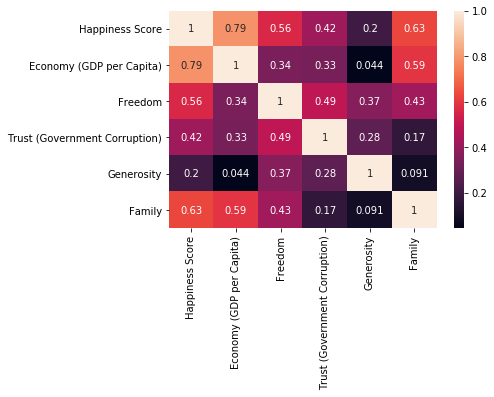

In [49]:
something_else_df = pd.DataFrame(clean_data,columns=['Happiness Score','Economy (GDP per Capita)','Freedom','Trust (Government Corruption)','Generosity', 'Family'])

corrMatrix = something_else_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

r value is: 0.7870779786627908
r squared value is: 0.6194917444959046


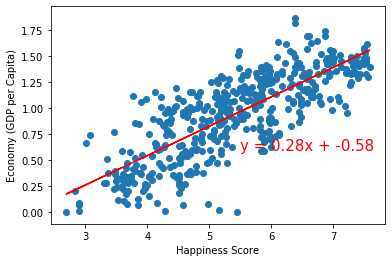

In [50]:

x_values = clean_data["Happiness Score"]
y_values = clean_data["Economy (GDP per Capita)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.5,0.6),fontsize=15,color="red")
plt.xlabel('Happiness Score')
plt.ylabel('Economy (GDP per Capita)')
print(f"r value is: {rvalue}")
print(f"r squared value is: {rvalue**2}")
plt.show()

r value is: 0.4988450784687635
r squared value is: 0.24884641231250684


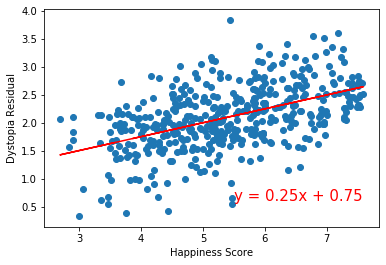

In [51]:
clean_data=clean_data.dropna()
x_values = clean_data["Happiness Score"]
y_values = clean_data["Dystopia Residual"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.5,0.6),fontsize=15,color="red")
plt.xlabel('Happiness Score')
plt.ylabel('Dystopia Residual')
print(f"r value is: {rvalue}")
print(f"r squared value is: {rvalue**2}")
plt.show()

In [52]:
# find countries that have some missing data (didn't participate every year, etc)

In [53]:
# group by region

# group by country

# group by year

In [19]:
# create summary table with statistics

In [ ]:
# create heatmap from google maps API (weight = happiness score)

In [ ]:
# find top 5 / bottom 5 for each year

In [ ]:
# find countries with biggest change in rankings/ratings

In [ ]:
# aggregate average for each country

# scatterplot matrix (as heatmap) to see correlations for each variable

# chart GDP vs Life expectancy (or other variables for a country)

In [ ]:
<<<<<<< REMOTE CELL DELETED >>>>>>>
all_data = pd.read_csv("./Resources/all_data.csv")
#all_data.iloc[0:10, :]
all_data.head(10)

In [ ]:
all_data.groupby("Region").mean()

In [ ]:
all_data.groupby("Country").mean()